<a href="https://colab.research.google.com/github/VictorFu0717/ishape/blob/main/bodyfat%E5%9B%9E%E6%AD%B8%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)

In [ ]:
import pandas as pd

df =  pd.read_csv("/content/body_width1.csv", encoding="utf-8")

# 測試資料：真人
filter = df["source"] == "真人"
tdf = df[filter]
filter = tdf["gender"] == "m"
tdf = tdf[filter]
tdf = tdf.dropna()


tdf = tdf.drop(["org_img","bw_img", "source","waist_width_px", "hip_width_px","chest_width_px","chest_width_cm","race","width_per_px","gender"], axis=1)
tx = tdf.drop(["waist_width_cm","hip_width_cm","bfp"],axis=1)
ty = tdf.drop(["height","weight",	"waist_width_cm","hip_width_cm","waist","hips","age","chest"], axis=1)
tx["bmi"]= tx["weight"]/(tx["height"]*tx["height"]/10000)

tx

,age,height,weight,waist,chest,hips,bmi
404,29.0,166.0,64.8,82.0,87.0,95.0,23.515750
405,24.0,165.0,48.1,68.0,76.5,84.0,17.667585
406,26.0,176.0,59.0,74.0,83.0,91.0,19.047004
407,23.0,179.0,98.7,105.0,103.0,114.0,30.804282
408,29.0,174.0,73.0,87.0,91.0,99.0,24.111507
410,29.0,172.0,72.9,87.0,95.0,99.0,24.641698
414,28.0,168.0,67.6,81.0,90.0,95.0,23.951247
417,24.0,168.0,92.7,89.0,99.5,110.0,32.844388
418,29.0,182.0,72.0,83.0,88.0,96.5,21.736505
419,24.0,161.5,50.5,66.5,77.0,88.0,19.361827


In [ ]:
filter = df["source"] == "水下秤重"
df = df[filter]
filter = df["bfp"] > 5
df = df[filter]

In [ ]:
df = df.drop(["org_img","bw_img", "source","waist_width_px", "hip_width_px","chest_width_px","chest_width_cm","race","gender","width_per_px"], axis=1)
# delect_idx = df.loc[371:402].index.tolist()
# df = df.drop(index=delect_idx)
df = df.dropna()

In [ ]:
x = df.drop(["waist_width_cm","hip_width_cm","bfp"], axis=1)
y = df.drop(["age","height","weight",	"waist_width_cm","hip_width_cm","waist","hips","chest"], axis=1)

x["bmi"]= x["weight"]/(x["height"]*x["height"]/10000)



print(len(x),"筆資料")
x

245 筆資料


,age,height,weight,waist,chest,hips,bmi
1,23.0,172.1,70.0,85.2,93.1,94.5,23.633949
2,22.0,183.5,78.6,83.0,93.6,98.7,23.342663
3,22.0,168.3,69.9,87.9,95.8,99.2,24.677942
4,26.0,183.5,83.8,86.4,101.8,101.2,24.886962
5,24.0,181.0,83.6,100.0,97.3,101.9,25.518147
...,...,...,...,...,...,...,...
266,70.0,170.2,60.9,83.6,89.2,88.8,21.023169
267,72.0,177.2,91.2,105.0,108.5,104.5,29.044734
269,72.0,167.6,84.7,111.5,111.1,101.7,30.153337
270,72.0,179.1,86.5,101.3,108.3,97.8,26.966522


In [ ]:
# 252筆資料跟真人測量資料合併來訓練模型

# x = pd.concat([x, tx], axis=0, ignore_index=True)
# y = pd.concat([y, ty], axis=0, ignore_index=True)
# x

In [ ]:
#回歸樹

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
reg = DecisionTreeRegressor()
params = {
    "max_depth":range(2, 100)
}
#GridSearch函式：利用交叉驗證幫你調出最佳參數

grid = GridSearchCV(reg, params, cv=10, n_jobs=-1, scoring="r2") #neg_mean_absolute_error
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_params_)

grid = GridSearchCV(reg, params, cv=10, n_jobs=-1, scoring="neg_mean_squared_error") #neg_mean_absolute_error
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_params_)

reg = DecisionTreeRegressor(max_depth = grid.best_params_['max_depth'])
reg.fit(x,y)
pre = reg.predict(tx)
pre - ty["bfp"]

0.48526454966627697
{'max_depth': 2}
-22.730597552044248
{'max_depth': 3}


404   -10.907593
405    -0.207593
406    -2.607593
407     1.278571
408    -2.546809
410    -3.346809
414    -9.507593
417   -13.446809
418    -5.507593
419     2.492407
Name: bfp, dtype: float64

0.48526454966627697
0.5083999347622028
0.41941479088221145
0.3877546249592889
0.41272704003444566
0.3184080808594568
0.24666481151391179
0.19619979226071899
0.21846254214598987
[0.48526454966627697, 0.5083999347622028, 0.41941479088221145, 0.3877546249592889, 0.41272704003444566, 0.3184080808594568, 0.24666481151391179, 0.19619979226071899, 0.21846254214598987]
1      12.6
2       6.9
3      24.6
4      10.9
5      27.8
       ... 
266    11.5
267    32.3
269    28.3
270    25.3
271    30.7
Name: bfp, Length: 245, dtype: float64


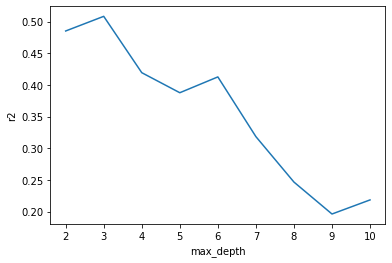

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

a = []
b = []

for i in range(2,11):
  reg = DecisionTreeRegressor(max_depth=i)
  scores = cross_val_score(reg, x, y, cv=10, scoring="r2")
  r2 = np.average(scores)
  print(np.array(r2))
  a.append(r2)
  b.append(i)
lines = plt.plot(np.array(b),np.array(a))
plt.ylabel("r2")
plt.xlabel("max_depth")
print(a)
print(df["bfp"])


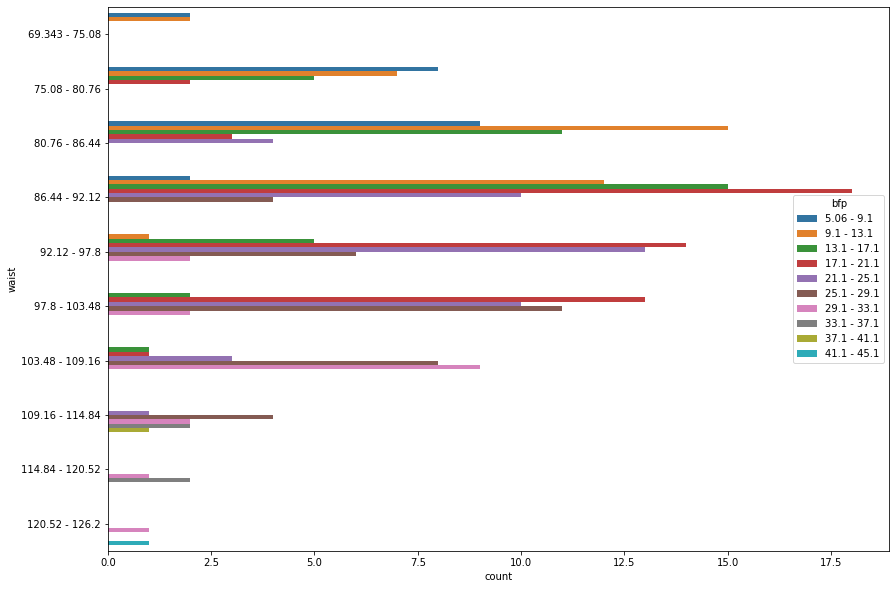

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
c = pd.cut(x["waist"], bins=10)
d = pd.cut(y["bfp"],bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
e = d.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(y= b, hue=e)

Text(0.5, 0, 'waist')

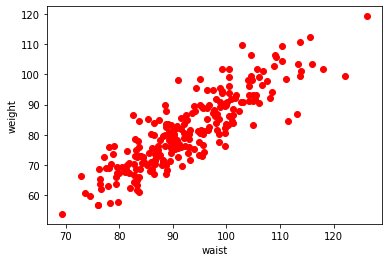

In [ ]:
fig = plt.figure()   

#圖表的設定
ax = fig.add_subplot(1, 1, 1)
a = df["waist"]
b = df["weight"]
#散佈圖
ax.scatter(a, b, color="red")
plt.ylabel("weight")
plt.xlabel("waist")

In [ ]:
#隨機森林回歸樹

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
regressor = RandomForestRegressor()
params = {
    "n_estimators":range(11, 100, 2),
    "max_depth":range(3, 11)
}
#GridSearch函式：利用交叉驗證幫你調出最佳參數

# grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="r2")
# grid.fit(x, y)
# print(grid.best_score_)
# print(grid.best_params_)
# bestparams1 = grid.best_params_

grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="neg_mean_squared_error")
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_params_)
bestparams2 = grid.best_params_







-18.96941144462898
{'max_depth': 4, 'n_estimators': 11}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
print(bestparams2)

{'max_depth': 5, 'n_estimators': 13}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=3,n_estimators=89)
regressor.fit(x, y)
pre = regressor.predict(tx)
pre - ty["bfp"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


404   -10.665989
405    -0.788300
406    -3.410670
407     1.686337
408    -3.829078
410    -4.560981
414    -9.227083
417   -17.410073
418    -6.263619
419     1.955348
Name: bfp, dtype: float64

In [ ]:
import pandas as pd
#找出特徵的重要性
pd.DataFrame(regressor.feature_importances_, 
       columns=["Importance"],
       index=x.keys()).sort_values(by="Importance", ascending=False)
       #ascending=False降冪排列

,Importance
waist,0.880964
height,0.040854
weight,0.027764
bmi,0.020465
hips,0.010554
age,0.010336
chest,0.009063


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
x_scale = scaler.fit_transform(x)
x_scale = pd.DataFrame(x_scale, columns=x.keys())
x_scale

,age,height,weight,waist,chest,hips,bmi
0,-0.966102,-0.455587,-0.504587,-0.443662,-0.436735,-0.532020,-0.468673
1,-1.000000,0.197708,-0.241590,-0.521127,-0.416327,-0.325123,-0.496332
2,-1.000000,-0.673352,-0.507645,-0.348592,-0.326531,-0.300493,-0.369541
3,-0.864407,0.197708,-0.082569,-0.401408,-0.081633,-0.201970,-0.349693
4,-0.932203,0.054441,-0.088685,0.077465,-0.265306,-0.167488,-0.289759
...,...,...,...,...,...,...,...
240,0.627119,-0.564470,-0.782875,-0.500000,-0.595918,-0.812808,-0.716580
241,0.694915,-0.163324,0.143731,0.253521,0.191837,-0.039409,0.045108
242,0.694915,-0.713467,-0.055046,0.482394,0.297959,-0.177340,0.150375
243,0.694915,-0.054441,0.000000,0.123239,0.183673,-0.369458,-0.152229


In [ ]:
#knn回歸
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

regressor = KNeighborsRegressor()
params = {
    "n_neighbors":range(1, 100)
}

grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="r2") #neg_mean_absolute_error
grid.fit(x_scale, y)
print(grid.best_score_)
print(grid.best_params_)

grid = GridSearchCV(regressor, params, cv=10, n_jobs=-1, scoring="neg_mean_squared_error") #neg_mean_absolute_error
grid.fit(x_scale, y)
print(grid.best_score_)
print(grid.best_params_)



0.46042443873031313
{'n_neighbors': 13}
-23.932614643750004
{'n_neighbors': 8}


In [ ]:
regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(x_scale,y)
pre = regressor.predict(tx)
pre - ty

,bfp
404,6.2125
405,15.3375
406,13.3000
407,2.7125
408,7.7125
410,6.9125
414,7.6125


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
#(degree提升的維度)

x_poly = poly_reg.fit_transform(x)
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
lin_reg2 = LinearRegression()
scores = cross_val_score(lin_reg2, x_poly, y, cv=10, scoring="r2") #scoring="r2","neg_mean_absolute_error"

print(scores)
print(np.average(scores))

lin_reg2 = LinearRegression()
scores = cross_val_score(lin_reg2, x_poly, y, cv=10, scoring="neg_root_mean_squared_error") #scoring="r2","neg_mean_absolute_error"

print(scores)
print(np.average(scores))





[ 0.36797936  0.597998   -2.97306383  0.02100704 -2.94528316  0.31571396
 -3.55909441 -0.44232709 -0.9663281  -4.50555684]
-1.4088955067232558
[ -4.83623539  -6.54836403 -14.5246775   -5.9067089   -8.0489888
  -5.08303092 -13.53427126  -8.76491102 -13.28464286 -16.7751894 ]
-9.730702007381934


In [ ]:
# 使用多項式回歸模型，輸入資料測試，記得要先transform

x_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
x_poly = poly_reg.transform(tx)
pre = lin_reg2.predict(x_poly)
pre 

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, x, y, cv=10, scoring="r2") #scoring="r2","neg_mean_absolute_error"
# 這裡就不用 fit 了, fit 和 predict 會由交叉驗證幫你做, cv 參數代表要幾次的交叉驗證
# n_jobs=-1使用最多核心來運算
print(scores)
print(np.average(scores))

scores = cross_val_score(lin_reg, x, y, cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

lin_reg.fit(x,y)
pre = lin_reg.predict(tx)
print(pre - ty)

[ 0.53181999  0.85485848  0.73747074  0.5490529  -0.00367056  0.54523474
  0.72958381  0.69783831  0.70362266  0.7265798 ]
0.6072390870321505
[-17.32592647 -15.48207153 -13.94007677 -16.07078777 -16.481459
 -17.1709808  -10.86485294 -16.0942473  -26.60043729 -13.9753989 ]
-16.400623876123255
           bfp
404  -6.760427
405  -5.028361
406  -5.312079
407   1.066056
408  -3.550805
410  -4.725940
414  -7.082104
417 -14.250679
418  -3.339669
419  -3.620470


In [ ]:
# 有調整偏度的線性回歸
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p, log1p,inv_boxcox1p
y = y["bfp"]
lamda = boxcox_normmax(1 + y)
y_trains = boxcox1p(y, lamda)
def getskew(series):
    return skew(series.dropna()+1)

skewness = (x[x.keys()].apply(getskew)
                  .sort_values(ascending=False))
# .sort_values排序
need_saved = skewness.index
def rlamda(s):
  lamda = boxcox_normmax(s.dropna() + 1)
  return (lamda)
realamda = x[need_saved].apply(rlamda)
realamda = realamda.to_dict()
def save(s):
    lamda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, lamda)
x[need_saved] = x[need_saved].apply(save)
skewness = (x[x.keys()].apply(getskew)
                  .sort_values(ascending=False))

test_row = pd.DataFrame(tx, columns=tx.keys())
# 將要預測的每個值做轉換,需要用當初訓練時用的lamda
for i in realamda.keys():
  test_row[i]= boxcox1p(test_row[i],realamda[i])
print(test_row)



pre = model.predict(test_row)
pre = inv_boxcox1p(pre, lamda)

print(pre)
print(ty["bfp"])

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("mean_absolute_error:",mean_absolute_error(pre, ty["bfp"]))
print("r2_score:",r2_score(pre, ty["bfp"]))
for i in realamda.keys():
  tx[i]= inv_boxcox1p(tx[i],realamda[i])
tx["bfp"] = ty["bfp"]
tx["pre"] = pre
tx["pre-bfp"] = (pre - tx["bfp"] )
print(tx)

           age    height    weight     waist     chest      hips       bmi
404  11.294238  2.181404  3.774785  1.579717  0.875317  0.629858  1.102203
405   9.941476  2.180623  3.535912  1.565033  0.874470  0.629762  1.081795
406  10.494348  2.188866  3.699875  1.571857  0.875021  0.629827  1.087596
407   9.658508  2.190991  4.107854  1.596870  0.876260  0.629971  1.117755
408  11.294238  2.187422  3.869628  1.584045  0.875586  0.629886  1.103786
410  11.294238  2.185954  3.868539  1.584045  0.875830  0.629886  1.105137
414  11.031273  2.182945  3.808502  1.578801  0.875521  0.629858  1.103367
417   9.941476  2.182945  4.058547  1.585669  0.876081  0.629951  1.120990
418  11.294238  2.193067  3.858669  1.580615  0.875386  0.629869  1.097024
419   9.941476  2.177838  3.575091  1.563177  0.874515  0.629800  1.088818
[16.29248747  6.80716213  8.33371062 27.32680539 17.71001824 17.32408512
 14.15064814 17.96452365 13.44738833  5.47459066]
404    22.6
405    11.9
406    14.3
407    26.1
408 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
tx_scale = scaler.transform(tx)

x_scale

array([[-1.75244079, -1.01809141, -0.93624216, ..., -0.97988889,
        -0.85155384, -0.53088743],
       [-1.83170016,  0.72672623, -0.22132815, ..., -0.91752909,
        -0.19420283, -0.61837972],
       [-1.83170016, -1.59969729, -0.94455511, ..., -0.64314595,
        -0.11594675, -0.21730769],
       ...,
       [ 2.13126822, -1.70683522,  0.28576202, ...,  1.2650641 ,
         0.27533361,  1.42731341],
       [ 2.13126822,  0.05328784,  0.43539519, ...,  0.91584919,
        -0.33506376,  0.47010327],
       [ 2.28978695, -0.14568259,  1.06717966, ...,  1.4271996 ,
         1.1204992 ,  1.31108659]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

x_pca = pca.fit_transform(x_scale)
tx_pca = pca.transform(tx_scale)

In [ ]:
#pca+線性回歸
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, x_pca, y, cv=10, scoring="r2") #scoring="r2","neg_mean_absolute_error"

print(scores)
print(np.average(scores))

scores = cross_val_score(lin_reg, x_pca, y, cv=10, scoring="neg_mean_squared_error") #scoring="r2","neg_mean_absolute_error"

print(scores)
print(np.average(scores))

lin_reg.fit(x_pca,y)

pre = lin_reg.predict(tx_pca)
pre - ty




[ 0.54543924  0.85490912  0.73971707  0.5636831  -0.02136759  0.53137999
  0.71753154  0.71441813  0.69746135  0.73280438]
0.6075976334362253
[-16.82191913 -15.47667034 -13.82079882 -15.54939895 -16.77206505
 -17.694107   -11.34909241 -15.21114441 -27.15342674 -13.65724026]
-16.350586309792


,bfp
404,-6.318973
405,-3.597354
406,-5.168668
407,1.130506
408,-3.476428
410,-4.598719
414,-6.811444
417,-15.218402
418,-3.607099
419,-2.102219


In [ ]:
#PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
import numpy as np
pls = PLSRegression(n_components=3)


scores = cross_val_score(pls, x, y, cv=10, scoring="r2")
print(scores)
print(np.average(scores))

scores = cross_val_score(pls, x, y, cv=10, scoring="neg_mean_absolute_error")
print(scores)
print(np.average(scores))


pls.fit(x,y)
scores = pls.score(x,y)

pre = pls.predict(tx)
print(pre - ty)
print(scores)

# tx["bfp"] = ty["bfp"]
# tx["pre"] = pre
# tx["pre-bfp"] = (pre - ty)
# print(tx)


[ 0.34442539  0.85659227  0.68480164  0.43908577 -0.03345167  0.50038449
  0.64496851  0.64298429  0.69908185  0.7508767 ]
0.5529749236745378
[-4.3184096  -3.20468496 -3.31816842 -3.78048226 -3.25872428 -3.78381073
 -2.8684188  -3.50928728 -4.45155851 -3.07360537]
-3.5567150211715926
          bfp
404 -4.618576
405 -2.782462
406 -4.884296
407  2.569511
408 -2.757189
410 -3.000590
414 -4.449803
417 -7.881501
418 -4.192190
419  1.069362
0.6841940305736763


0.6376076035375345
0.6841940305736763
0.7168302470986698
0.718651374360032
0.7189145948960785
0.7201533263241873


Text(0.5, 0, 'n_components')

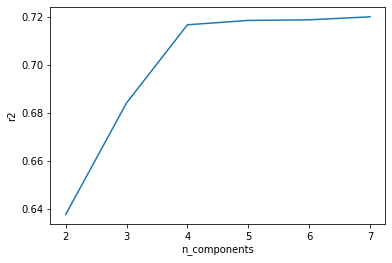

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

a = []
b = []

for i in range(2,8):
  pls = PLSRegression(n_components= i)
  pls.fit(x,y)
  r2 = pls.score(x,y)
  print(np.array(r2))
  a.append(r2)
  b.append(i)
lines = plt.plot(np.array(b),np.array(a))
plt.ylabel("r2")
plt.xlabel("n_components")



20.822950064875272
18.514145001888295
16.618779932128582
16.345257243251464
16.34085153190822
16.40062387612326


Text(0.5, 0, 'n_components')

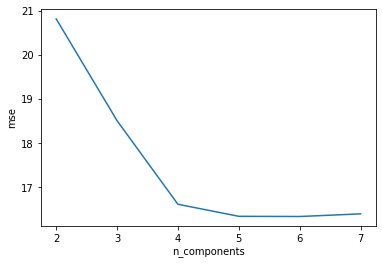

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

a = []
b = []

for i in range(2,8):
  pls = PLSRegression(n_components= i)
  scores = cross_val_score(pls, x, y, cv=10, scoring="neg_mean_squared_error")
  mse = abs(np.average(scores))
  print(mse)
  a.append(mse)
  b.append(i)
lines = plt.plot(np.array(b),np.array(a))
plt.ylabel("mse")
plt.xlabel("n_components")


39.91722748386672
17.677451087491026
37.09454291130155
41.83650959562318
40.07676251420543
41.27843962682379


Text(0.5, 0, 'n_components')

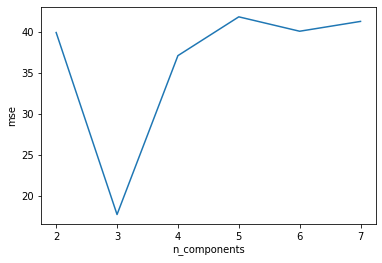

In [ ]:
from sklearn.metrics import mean_squared_error
a = []
b = []

for i in range(2,8):
  pls = PLSRegression(n_components= i)
  pls.fit(x,y)
  pre = pls.predict(tx)
  mse = mean_squared_error(ty,pre)
  print(mse)
  a.append(mse)
  b.append(i)
lines = plt.plot(np.array(b),np.array(a))
plt.ylabel("mse")
plt.xlabel("n_components")

-0.9144899804761455
0.352704356715678
-0.02415951947061523
-0.10143510781063303
-0.09455878868190926
-0.25117061932359275


Text(0.5, 0, 'n_components')

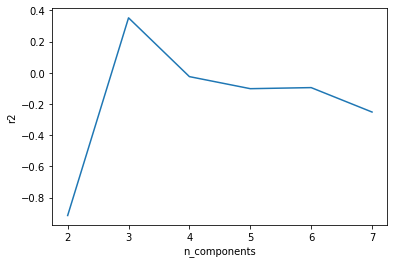

In [ ]:
from sklearn.metrics import r2_score
a = []
b = []

for i in range(2,8):
  pls = PLSRegression(n_components= i)
  pls.fit(x,y)
  pre = pls.predict(tx)
  r2 = r2_score(ty,pre)
  print(r2)
  a.append(r2)
  b.append(i)
lines = plt.plot(np.array(b),np.array(a))
plt.ylabel("r2")
plt.xlabel("n_components")

In [ ]:
#儲存模型
from sklearn.externals import joblib
joblib.dump(pls , "PLSRegression.h5")

['PLSRegression.h5']

In [ ]:
#svr回歸
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

 
# 使用线性核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
linear_svr = SVR(kernel='linear')

# 使用多项式核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
poly_svr = SVR(kernel='poly')

 
# 使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测。
rbf_svr = SVR(kernel='rbf')

#scoring="r2","neg_mean_absolute_error","neg_mean_squared_error"
scores = cross_val_score(linear_svr, np.array(x_scale), np.array(y), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(linear_svr, np.array(x_scale), np.array(y), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

rbf_svr.fit(x_scale,y)
tx_scale = scaler.transform(tx)
pre = rbf_svr.predict(tx_scale)
print(pre)
ty["bfp"] - pre

[0.32334378 0.84800245 0.69067837 0.42643149 0.06386431 0.48451766
 0.65351145 0.60543278 0.65768805 0.75632182]
0.5509792152899524
[-25.04100066 -16.21339667 -16.42471135 -20.4407521  -15.37245646
 -19.46353024 -13.92130835 -21.01610651 -30.72315714 -12.45518697]
-19.107160644940347
[16.3621712  17.96137995 14.27980076 22.06353527 16.82148812 17.43438253
 15.91924762 20.84115717 14.02100347 18.1878628 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

404     6.237829
405    -6.061380
406     0.020199
407     4.036465
408     4.278512
410     4.465617
414     5.280752
417    11.158843
418     3.178997
419    -8.987863
Name: bfp, dtype: float64

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
cv = LassoCV(cv=10)
cv.fit(x_scale, y)
print(cv.alpha_)
model =Lasso(alpha = cv.alpha_ )


scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

pre = model.predict(tx_scale)
pre - ty

0.01046747121967847
[0.53123421 0.85624501 0.74129232 0.55838621 0.01874733 0.53295262
 0.71537254 0.70889429 0.69769769 0.73732233]
0.6098144544968431
[-17.34760439 -15.33417206 -13.73715434 -15.73816861 -16.11333061
 -17.63472811 -11.43583734 -15.5053648  -27.13221453 -13.42631322]
-16.340488800358607


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
cv = RidgeCV(cv=10)
cv.fit(x_scale, y)
print(cv.alpha_)
model =Ridge(alpha = cv.alpha_ )


scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

# model.fit(x_scale,y)
# tx_scale = scaler.transform(tx)
# pre = model.predict(tx_scale)
# tx["bfp"] = ty["bfp"]
# tx["pre"] = pre
# tx["pre-bfp"] = (pre - ty)

# print(tx)

0.1
[0.53358282 0.85632396 0.73813728 0.55484858 0.00958776 0.53785808
 0.72161731 0.70536315 0.69832406 0.73502971]
0.6090672699360264
[-17.26068945 -15.32575081 -13.90468405 -15.86424234 -16.26374168
 -17.44950816 -11.18493323 -15.69344629 -27.07599697 -13.5434964 ]
-16.356648937851393


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
cv = ElasticNetCV(cv=10)
cv.fit(x_scale, y)
print(cv.alpha_)
model = ElasticNet(alpha = cv.alpha_ )


scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(x_scale), np.array(y), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))

0.004206317725595558
[0.50744433 0.85853775 0.73462291 0.54393156 0.06342829 0.53493993
 0.71321742 0.69366833 0.69123203 0.7464372 ]
0.6087459763866871
[-18.22799579 -15.08960817 -14.09129403 -16.25330122 -15.37961637
 -17.55969141 -11.52242613 -16.31635554 -27.71251999 -12.96042237]
-16.5113231022702


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


skew: 0.2555293674860277
lambda: 0.6806000806457337


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


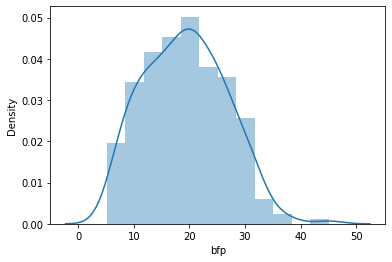

In [ ]:
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p, log1p

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y = y["bfp"]
lamda = boxcox_normmax(1 + y)
print("skew:", skew(y+1))
print("lambda:", lamda)
sns.distplot(y)


after boxcox: -0.00529538896966427


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


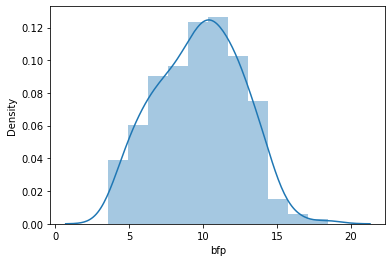

In [ ]:
y_trains = boxcox1p(y, lamda)
print("after boxcox:", skew(y_trains))
sns.distplot(y_trains)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


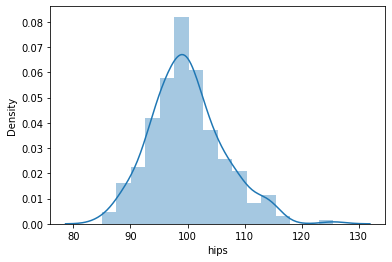

In [ ]:
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p, log1p

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = x["hips"]

sns.distplot(d)

In [ ]:

def getskew(series):
    return skew(series.dropna()+1)

skewness = (x[x.keys()].apply(getskew)
                  .sort_values(ascending=False))
# .sort_values排序
need_saved = skewness.index
print(skewness)
print(need_saved)

bmi       0.702531
hips      0.522841
chest     0.492628
waist     0.440298
weight    0.380316
age       0.260781
height    0.118854
dtype: float64
Index(['bmi', 'hips', 'chest', 'waist', 'weight', 'age', 'height'], dtype='object')


In [ ]:
def rlamda(s):
  lamda = boxcox_normmax(s.dropna() + 1)
  return (lamda)
realamda = x[need_saved].apply(rlamda)
realamda = realamda.to_dict()
print(realamda)

{'bmi': -0.8468706490917524, 'hips': -1.5865212458057332, 'chest': -1.1353612425564783, 'waist': -0.5853777229894735, 'weight': -0.05035138927949351, 'age': 0.6053179303907976, 'height': -0.3989086937654337}


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [ ]:
def save(s):
    lamda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, lamda)
x[need_saved] = x[need_saved].apply(save)
skewness = (x[x.keys()].apply(getskew)
                  .sort_values(ascending=False))

skewness

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


age       0.022015
chest     0.010569
waist     0.003500
height   -0.001871
weight   -0.002241
bmi      -0.008526
hips     -0.013096
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x)
x_norm = pd.DataFrame(scaler.transform(x),
              columns=x.columns)

x_norm


,age,height,weight,waist,chest,hips,bmi
0,-0.954954,-0.400153,-0.331786,-0.236259,-0.211118,-0.332000,-0.161972
1,-1.000000,0.261587,-0.039556,-0.328811,-0.187131,-0.088203,-0.196766
2,-1.000000,-0.634435,-0.335399,-0.127665,-0.084727,-0.060931,-0.043269
3,-0.824067,0.261587,0.121466,-0.187338,0.170847,0.044720,-0.020568
4,-0.910643,0.121450,0.115467,0.301375,-0.017708,0.080448,0.045977
...,...,...,...,...,...,...,...
240,0.688882,-0.516385,-0.684583,-0.303191,-0.407982,-0.710831,-0.503993
241,0.746793,-0.096795,0.333566,0.455646,0.421043,0.207811,0.369946
242,0.746793,-0.678395,0.148279,0.639761,0.509555,0.070304,0.457725
243,0.746793,0.013133,0.201030,0.342634,0.414048,-0.138194,0.188158


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
cv = RidgeCV(cv=10)
cv.fit(x_norm, y_trains)
print(cv.alpha_)
model =Ridge(alpha = cv.alpha_ )


scores = cross_val_score(model, np.array(x_norm), np.array(y_trains), cv=10, scoring="r2") 
print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(x_norm), np.array(y_trains), cv=10, scoring="neg_mean_squared_error") 
print(scores)
print(np.average(scores))






for i in realamda.keys():
  x[i]= inv_boxcox1p(x[i],realamda[i])

model.fit(x_norm, y_trains)
pre = model.predict(x_norm)
pre = inv_boxcox1p(pre, lamda)

coeffecients = pd.DataFrame(model.coef_,x.columns) 
coeffecients.columns = ['Coeffecient'] 
coeffecients["%"] = coeffecients['Coeffecient'].abs()/(coeffecients['Coeffecient'].abs().sum())*100
coeffecients


0.1
[ 0.48770178  0.83542322  0.73884942  0.56747063 -0.02910818  0.5498861
  0.67970087  0.68580561  0.65730691  0.74532927]
0.5918365616375697
[-3.19796339 -2.61979834 -2.11023139 -2.39805091 -2.38772425 -2.71794994
 -1.8435601  -2.60147171 -4.28869076 -1.7944734 ]
-2.5959914173245524


,Coeffecient,%
age,0.032950,0.272974
height,-1.456471,12.066191
weight,-0.356588,2.954166
waist,8.416469,69.726554
chest,-1.500438,12.430430
hips,-0.180321,1.493874
bmi,-0.127444,1.055811


In [ ]:
x["bfp"] = y
x["pre"] = pre
x["pre-bfp"] = (pre - x["bfp"] )

x.to_csv("252.csv")

In [ ]:
test_row = pd.DataFrame(tx, columns=tx.keys())
# 將要預測的每個值做轉換,需要用當初訓練時用的lamda
for i in realamda.keys():
  test_row[i]= boxcox1p(test_row[i],realamda[i])
print(test_row)


tx_norm2 = scaler.transform(test_row)
pre = model.predict(tx_norm2)
pre = inv_boxcox1p(pre, lamda)

print(pre)
print(ty["bfp"])

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("mean_absolute_error:",mean_absolute_error(pre, ty["bfp"]))
print("r2_score:",r2_score(pre, ty["bfp"]))
for i in realamda.keys():
  tx[i]= inv_boxcox1p(tx[i],realamda[i])
tx["bfp"] = ty["bfp"]
tx["pre"] = pre
tx["pre-bfp"] = (pre - tx["bfp"] )
print(tx)


tx.to_csv("252_7.csv")





           age    height    weight     waist     chest      hips       bmi
404  11.294238  2.181404  3.774785  1.579717  0.875317  0.629858  1.102203
405   9.941476  2.180623  3.535912  1.565033  0.874470  0.629762  1.081795
406  10.494348  2.188866  3.699875  1.571857  0.875021  0.629827  1.087596
407   9.658508  2.190991  4.107854  1.596870  0.876260  0.629971  1.117755
408  11.294238  2.187422  3.869628  1.584045  0.875586  0.629886  1.103786
410  11.294238  2.185954  3.868539  1.584045  0.875830  0.629886  1.105137
414  11.031273  2.182945  3.808502  1.578801  0.875521  0.629858  1.103367
417   9.941476  2.182945  4.058547  1.585669  0.876081  0.629951  1.120990
418  11.294238  2.193067  3.858669  1.580615  0.875386  0.629869  1.097024
419   9.941476  2.177838  3.575091  1.563177  0.874515  0.629800  1.088818
[16.2232993   6.61000692  8.23403706 27.19824274 17.63613102 17.32860205
 14.16943955 18.13602743 13.34152267  5.4637648 ]
404    22.6
405    11.9
406    14.3
407    26.1
408 